In [1]:
import pandas as pd
df = pd.read_csv('Boston.csv')
df.head(2)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [2]:
df2 = df.fillna(df.mean(numeric_only = True))

In [3]:
dummy = pd.get_dummies(df['CRIME'], drop_first = True, dtype = int)
df3 = pd.concat([df2, dummy], axis=1)
df3 = df3.drop(columns = ['CRIME'])
df3

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.70,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.60,27.71,13.2,1,0
2,82.5,2.03,0,0.415,6.162,38.4,6.2700,2.0,348,14.7,393.77,7.43,24.1,0,1
3,0.0,21.89,0,0.624,6.151,97.9,1.6687,4.0,437,21.2,396.90,18.46,17.8,1,0
4,0.0,18.10,0,0.614,6.980,67.6,2.5329,24.0,666,20.2,374.68,11.66,29.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,18.10,0,0.740,6.219,100.0,2.0048,24.0,666,20.2,395.69,16.59,18.4,0,0
96,0.0,18.10,0,0.655,5.759,48.2,3.0665,24.0,666,20.2,334.40,14.13,19.9,0,0
97,0.0,18.10,0,0.671,6.380,96.2,1.3861,24.0,666,20.2,396.90,23.69,13.1,0,0
98,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33,17.8,1,0


In [4]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
df4 = df3.astype('float')
sc_df = model.fit_transform(df4)
sc_df
pd.DataFrame(sc_df, columns=df3.columns)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,-0.467750,1.249826,-0.229416,1.576995,-3.499220,0.800793,-1.128755,1.846563,1.776804,0.870770,-0.303459,-0.692464,0.424585,-0.577350,-1.0
1,-0.467750,-0.337700,-0.229416,-0.048340,-0.374040,0.589124,0.019857,-0.574758,-0.462288,1.284683,-2.366667,2.336991,-1.077163,1.732051,-1.0
2,3.432136,-1.311574,-0.229416,-1.158986,-0.096712,-0.975080,1.121690,-0.816890,-0.206570,-1.974883,0.356734,-0.646853,0.067526,-0.577350,1.0
3,-0.467750,1.853915,-0.229416,0.728209,-0.111102,1.159555,-1.101934,-0.574758,0.348525,1.388161,0.409624,0.976017,-0.594083,1.732051,-1.0
4,-0.467750,1.249826,-0.229416,0.637912,0.973358,0.072506,-0.684301,1.846563,1.776804,0.870770,0.034157,-0.024483,0.666125,-0.577350,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.467750,1.249826,-0.229416,1.775647,-0.022147,1.234896,-0.939511,1.846563,1.776804,0.870770,0.389178,0.700880,-0.531073,-0.577350,-1.0
96,-0.467750,1.249826,-0.229416,1.008127,-0.623898,-0.623493,-0.426433,1.846563,1.776804,0.870770,-0.646482,0.338934,-0.373547,-0.577350,-1.0
97,-0.467750,1.249826,-0.229416,1.152602,0.188466,1.098566,-1.238504,1.846563,1.776804,0.870770,0.409624,1.745519,-1.087664,-0.577350,-1.0
98,-0.467750,-0.057173,-0.229416,0.005837,-0.421134,0.632175,0.024013,-0.574758,-0.480999,-0.060535,0.304858,0.956890,-0.594083,1.732051,-1.0


In [5]:
from sklearn.decomposition import PCA
model = PCA(n_components = 2, whiten = True)
model.fit(sc_df)
new = model.transform(sc_df)

new_df = pd.DataFrame(new)
new_df.columns=['PC1','PC2']
df5 = pd.DataFrame(sc_df, columns = df4.columns)

df6 = pd.concat([df5, new_df], axis=1)

In [6]:
df_corr = df6.corr().loc[:'very_low', 'PC1':]

In [7]:
df_corr['PC1'].sort_values(ascending = False)

INDUS       0.891989
NOX         0.868891
TAX         0.814979
RAD         0.762947
AGE         0.739745
LSTAT       0.683921
PTRATIO     0.403417
CHAS        0.104808
low         0.095129
B          -0.453200
RM         -0.483825
PRICE      -0.501186
ZN         -0.560802
DIS        -0.744414
very_low   -0.781958
Name: PC1, dtype: float64

In [8]:
df_corr['PC2'].sort_values(ascending = False)

PRICE       0.654321
low         0.622828
RM          0.596553
AGE         0.295669
CHAS        0.291786
NOX         0.203678
B           0.083456
INDUS       0.041801
RAD        -0.151461
TAX        -0.170203
ZN         -0.226097
LSTAT      -0.263043
very_low   -0.408543
DIS        -0.432478
PTRATIO    -0.501855
Name: PC2, dtype: float64

<Axes: xlabel='City', ylabel='Exculusive residential'>

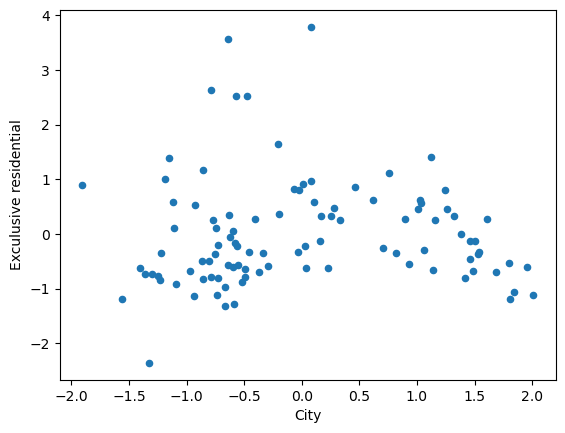

In [9]:
col = ['City', 'Exculusive residential']

new_df.columns = col

new_df.plot(kind='scatter', x='City', y='Exculusive residential')

In [10]:
model = PCA(whiten = True)

tmp = model.fit_transform(sc_df)
tmp.shape

(100, 15)

In [11]:
model.explained_variance_ratio_

array([0.41102789, 0.14484698, 0.10192698, 0.06448954, 0.06233684,
       0.05810331, 0.04843711, 0.02885228, 0.02142431, 0.01831962,
       0.01572944, 0.01068611, 0.00918466, 0.00277548, 0.00185945])

<Axes: >

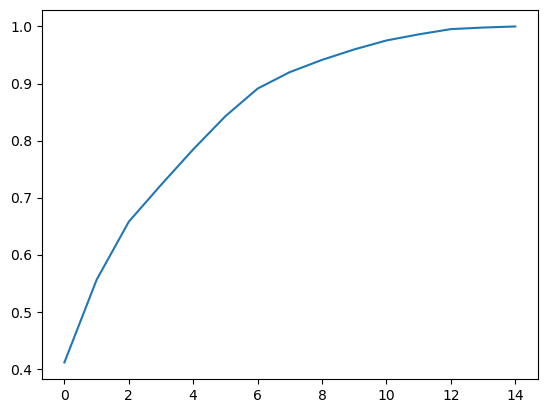

In [12]:
ratio = model.explained_variance_ratio_

array = []

for i in range(len(ratio)):
    ruiseki = sum(ratio[0:(i+1)])
    array.append(ruiseki)

pd.Series(array).plot(kind='line')


In [13]:
for i in range(len(ratio)):
    ruiseki = sum(ratio[0:i+1])
    if ruiseki >= 0.8:
        break
print(f'最初から{i+1}列目までとると累積{ruiseki * 100}%になります')

最初から6列目までとると累積84.2731547013668%になります


In [14]:
model = PCA(n_components = 6, whiten = True)

model.fit (sc_df)

new = model.transform (sc_df)


In [15]:
col = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
new_df2 = pd.DataFrame(new, columns = col)

new_df2.to_csv('boston_pca.csv', index = False)